`May 9, 2022`

## **ML for Business & Analytics Exercise**

### **Study Case: HR Analytics**

You are hired as a data scientist in a tech start-up company. Congratulation!
During your probationary period, you are assigned to the HR division to help them validate and uncover the pattern of employee attrition behavior lately. HR division already made satisfaction survey for all employees but they didn't know what to do about the survey result, in the same time they should prevent people leaving the company. Moreover, HR division wants to give treatment to an employee who has any minor characteristic/intention to resign, but HR division doesn't know how to automate it in the future.

Help HR division to solve all of the spotted problems!

**Objectives**

1. Find out which feature mostly determines employee to churn/resign
2. Create ML model to automate the resign prediction

**Special Note**
- You will present this result to higher management stakeholder. Mind your words, use less technical terminologies. 
- Do not too much bring unnecessary findings, focus on actionable/measurable insights

| column name | description | 
| -- | -- |
| Age | Age of employee |
| Attrition | Has this employee resigned/not
| BusinessTravel | Classification of traveling 
| DailyRate | Daily income of the employee
| Department | Department where the employee works
| DistanceFromHome | Distance in km from employee's home to the office
| Education | Education level of the employee, read the detail description below about the category
| EducationField | Education field of the employee
| EmployeeCount | Count of the employee's subordinate
| EmployeeNumber | Employee ID
| EnvironmentSatisfaction | Employee satisfaction level, read the detail description below about the category
| Gender | Gender of employee
| HourlyRate | Hourly rate of the employee
| MaritalStatus | Marital status of the employee
| MonthlyIncome | Monthly income of the employee
| MonthlyRate | Monthly rate of the employee
| NumCompaniesWorked | Number of companies worked of the employee
| Over18 | Has working over 18 o'clock?
| OverTime | Has working overtime?
| PercentSalaryHike | Percentage of salary increment of the employee
| PerformanceRating | Performance rating of the employee, read the detail description below about the category
| RelationshipSatisfaction | Relationship satisfaction of the employee, read the detail description below about the category
| TrainingTimesLastYear | Number of training given to the employee
| WorkLifeBalance | Work Life balance survey of the employee, read the detail description below about the category
| YearsAtCompany | Number of years have been passed to work on the company
| YearsInCurrentRole | Number of years have been passed to work in current role on the company
| YearsSinceLastPromotion | Number of years have been passed to work after promotion
| YearsWithCurrManager | Number of years have been passed to work with current manager

### **Additional Information:**

**Education**
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

**EnvironmentSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**JobInvolvement**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**JobSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**PerformanceRating**
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

**RelationshipSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**WorkLifeBalance**
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

### **Import libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, ClusterCentroids
from imblearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve, average_precision_score, plot_precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_column', 100)

### **Explore dataset**

In [2]:
df = pd.read_csv('hr_analytics.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [5]:
df['Attrition'].value_counts()/len(df['Attrition'])*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

In [6]:
df.isna().sum().sum()

0

In [7]:
for x in df.columns:
    total_unique_values = len(df[x].unique())
    print(f'Unique value of {x} is {total_unique_values}')

Unique value of Age is 43
Unique value of Attrition is 2
Unique value of BusinessTravel is 3
Unique value of DailyRate is 886
Unique value of Department is 3
Unique value of DistanceFromHome is 29
Unique value of Education is 5
Unique value of EducationField is 6
Unique value of EmployeeCount is 1
Unique value of EmployeeNumber is 1470
Unique value of EnvironmentSatisfaction is 4
Unique value of Gender is 2
Unique value of HourlyRate is 71
Unique value of JobInvolvement is 4
Unique value of JobLevel is 5
Unique value of JobRole is 9
Unique value of JobSatisfaction is 4
Unique value of MaritalStatus is 3
Unique value of MonthlyIncome is 1349
Unique value of MonthlyRate is 1427
Unique value of NumCompaniesWorked is 10
Unique value of Over18 is 1
Unique value of OverTime is 2
Unique value of PercentSalaryHike is 15
Unique value of PerformanceRating is 2
Unique value of RelationshipSatisfaction is 4
Unique value of StandardHours is 1
Unique value of StockOptionLevel is 4
Unique value of To

In [8]:
for x in df.columns:
    total_unique_values = len(df[x].unique())
    if total_unique_values > 9:
        print(f'Unique value of {x} is {total_unique_values}')

Unique value of Age is 43
Unique value of DailyRate is 886
Unique value of DistanceFromHome is 29
Unique value of EmployeeNumber is 1470
Unique value of HourlyRate is 71
Unique value of MonthlyIncome is 1349
Unique value of MonthlyRate is 1427
Unique value of NumCompaniesWorked is 10
Unique value of PercentSalaryHike is 15
Unique value of TotalWorkingYears is 40
Unique value of YearsAtCompany is 37
Unique value of YearsInCurrentRole is 19
Unique value of YearsSinceLastPromotion is 16
Unique value of YearsWithCurrManager is 18


**DROP**
- EmployeeCount, Over18, StandardHours: hanya terdiri dari 1 value
- EmployeeNumber: tidak memiliki prediktif value 

In [9]:
df = df.drop(columns=['EmployeeCount', 'Over18', 'EmployeeNumber', 'StandardHours'])

In [10]:
df['Attrition'] = np.where(df['Attrition'] == 'Yes', 1, 0)

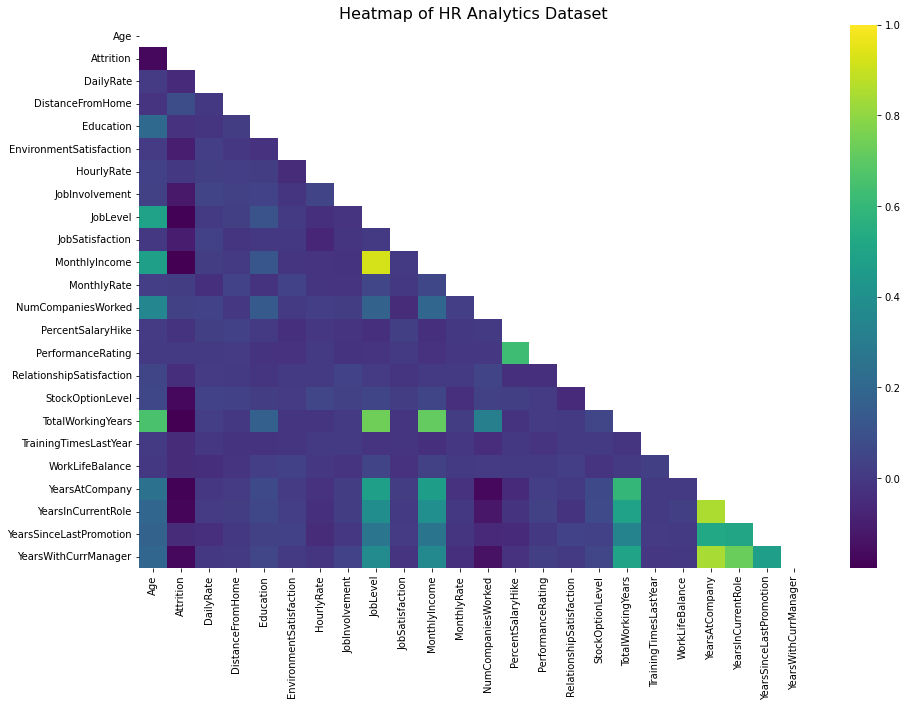

In [11]:
# Plot a heatmap to see correlation among numerical features
mask = np.zeros_like(df.corr()) 
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(15, 10))
plt.title('Heatmap of HR Analytics Dataset', size=16)
sns.heatmap(df.corr(method='spearman'), cmap='viridis', mask=mask, vmax=1);

In [12]:
df.corr()['Attrition']

Age                        -0.159205
Attrition                   1.000000
DailyRate                  -0.056652
DistanceFromHome            0.077924
Education                  -0.031373
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
YearsSinceLastPromotion    -0.033019
YearsWithCurrManager       -0.156199
Name: Attrition, dtype: float64

### **EDA**

**Categorical features**

In [13]:
cat_features = df.select_dtypes(include=[np.object]).columns
df[cat_features].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


**Attrition**

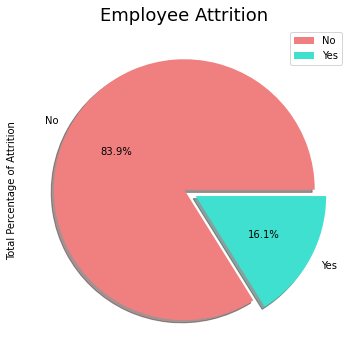

In [14]:
# Create a pie chart of attrition feature
plt.figure(figsize=(10, 6))
colors=['lightcoral', 'turquoise']
df['Attrition'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=colors, labels= ['No', 'Yes'], fontsize=10)
plt.legend(loc='best')
plt.title('Employee Attrition', fontsize=18)
plt.ylabel('Total Percentage of Attrition');

**Business Travel**

In [15]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

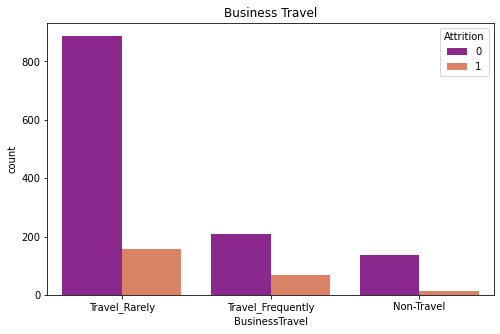

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette='plasma')
plt.title('Business Travel');

**Department**

In [17]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

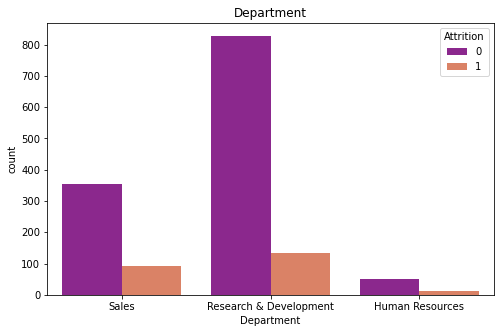

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Department', hue='Attrition', data=df, palette='plasma')
plt.title('Department');

**Education Field**

In [19]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

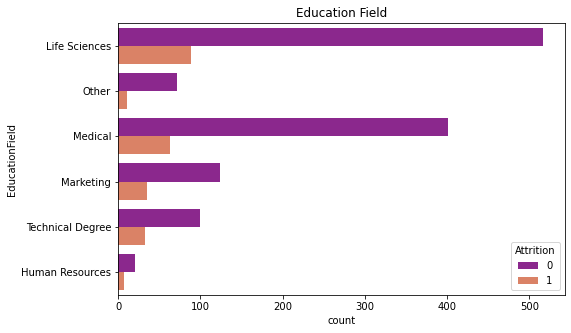

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(y='EducationField', hue='Attrition', data=df, palette='plasma')
plt.title('Education Field');

**Gender & Marital Status**

In [21]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

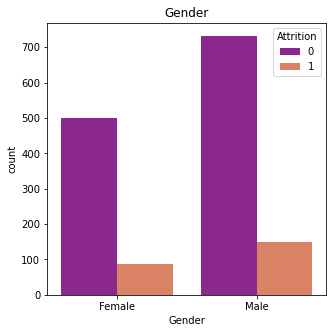

In [22]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Gender', hue='Attrition', data=df, palette='plasma')
plt.title('Gender');

In [23]:
pd.crosstab(df['MaritalStatus'], df['Gender'])

Gender,Female,Male
MaritalStatus,,
Divorced,117,210
Married,272,401
Single,199,271


**Job Role**

In [24]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

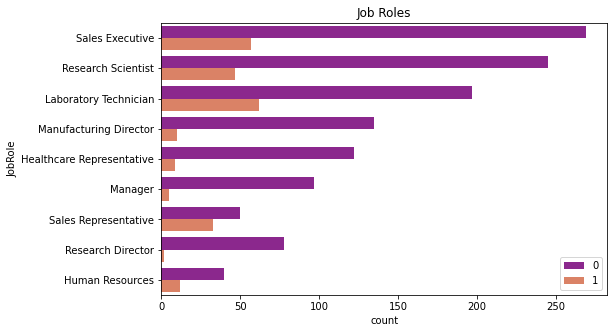

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(y='JobRole', hue='Attrition', data=df, palette='plasma')
plt.title('Job Roles')
plt.legend(loc='best');

**OverTime**

In [26]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

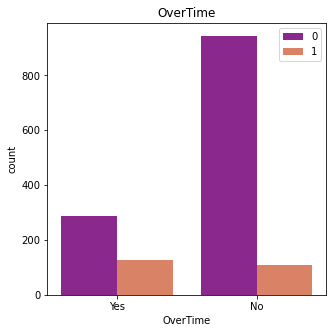

In [27]:
plt.figure(figsize=(5, 5))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='plasma')
plt.title('OverTime')
plt.legend(loc='best');

In [28]:
# How many male and female do overtime?
a = pd.crosstab(df['OverTime'], df['Gender'])
b = pd.crosstab(df['OverTime'], df['Gender']).apply(lambda r: r/r.sum(), axis=1)

display(pd.DataFrame(a))
display(pd.DataFrame(b))

Gender,Female,Male
OverTime,,
No,408,646
Yes,180,236


Gender,Female,Male
OverTime,,
No,0.387097,0.612903
Yes,0.432692,0.567308


#### **Insights**

Ada beberapa karakteristik pegawai yang lebih memiliki kecenderungan untuk resign, yaitu:
1. Pegawai yang sering traveling.
2. Pegawai di department sales.
3. Pegawai yang masih single.
4. Pegawai perempuan.
5. Pegawai yang sering kerja overtime.

### **Numerical features**

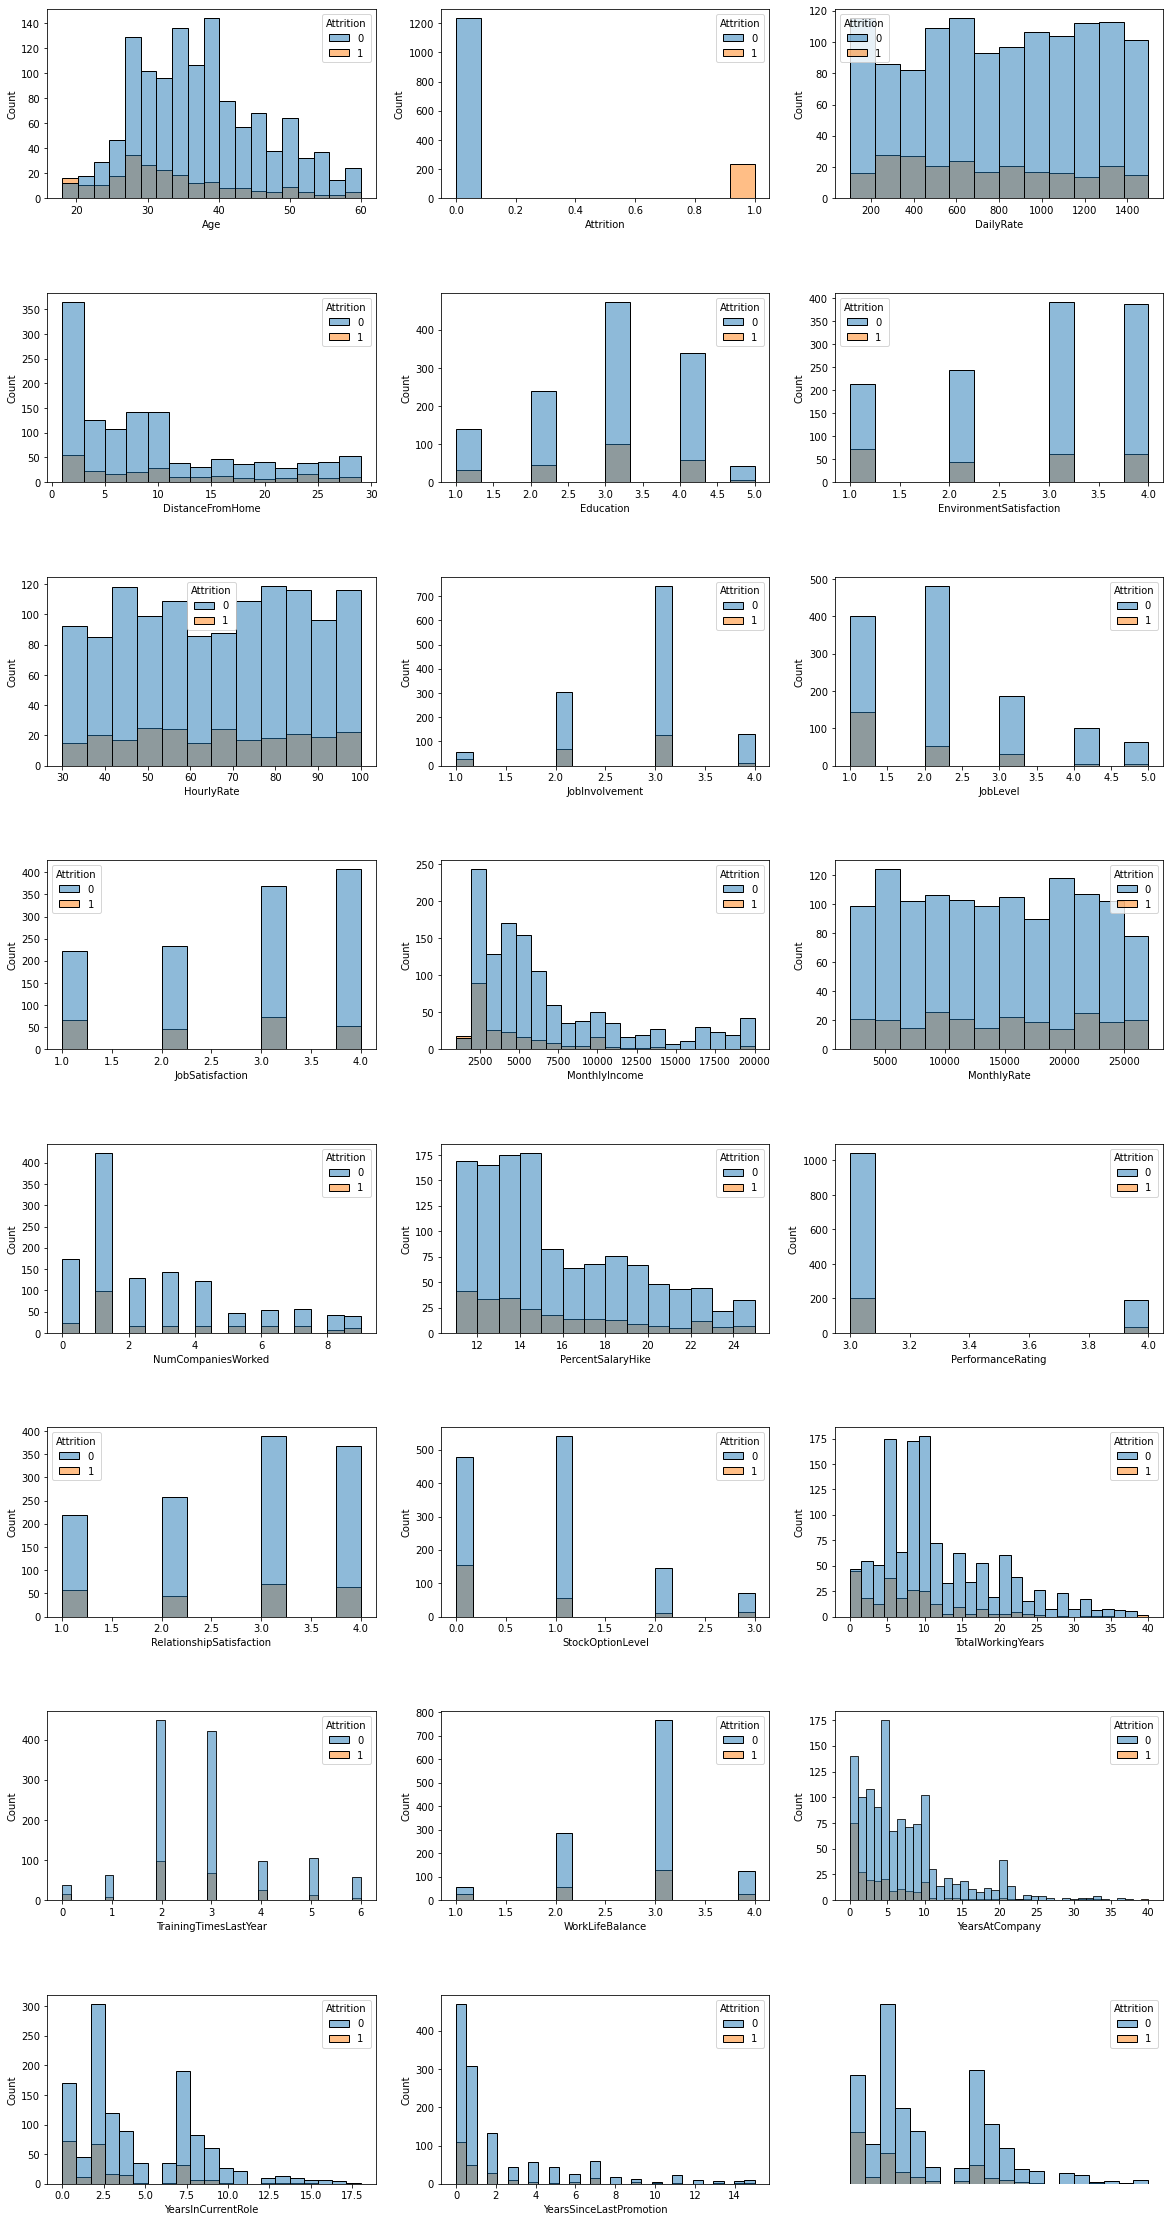

In [29]:
num_features = []
for column in df.columns:
    if df[column].dtype != object:
        num_features.append(column)

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 40))
fig.subplots_adjust(hspace=0.5)

for feat, ax in zip(num_features, axes.flatten()):
    sns.histplot(data=df, x=feat, hue='Attrition', ax=ax)
    axes[7, 2].set_axis_off();

**Interpretasi**

Berdasarkan numerical features, terdapat karakteristik pegawai yang memiliki kecenderungan untuk resign, yaitu:
1. Pegawai dengan low satisfaction (terindikasi dari EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction).
2. Pegawai yang mendapatkan low benefit (terindikasi dari MonthlyIncome, StockOptionLevel).
3. Pegawai yang masih muda.
4. Pegawai dengan high number of company worked.

Dilihat dari distribusi jumlah attrition-nya, feature MonthlyIncome dan YearsAtCompany memiliki indikasi sebagai prediktor yang baik.

### **Feature engineering**

- Grouping job roles based on job level.
- Grouping age by generation.

In [30]:
list_roles = []

for index, col in df.iterrows():
    if col['JobRole'] == 'Sales Representative' or col['JobRole'] == 'Healthcare Representative' or col['JobRole'] == 'Laboratory Technician' or col['JobRole'] == 'Human Resources':
        result = 'Staff'
    elif col['JobRole'] == 'Sales Executive' or col['JobRole'] == 'Research Scientist':
        result = 'Middle'
    else:
        result = 'Executive'
        
    list_roles.append(result)

df['JobRole'] = list_roles
df['JobRole'].head()

0    Middle
1    Middle
2     Staff
3    Middle
4     Staff
Name: JobRole, dtype: object

In [31]:
list_gen = []

for index, col in df.iterrows():
    if col['Age'] >= 55:
        result = 'Boomers'
    elif col['Age'] >= 40 and col['Age'] <= 54:
        result = 'Gen X'
    elif col['Age'] >= 23 and col['Age'] <= 39:
        result = 'Gen Y'
    else:
        result = 'Gen Z'
    list_gen.append(result)

df['Generation'] = list_gen
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Generation
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Middle,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,Gen X
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Middle,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,Gen X
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Staff,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,Gen Y
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Middle,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,Gen Y
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Staff,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,Gen Y


### **Preprocessing**

#### **Encoding for feature selection**

In [32]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 'OverTime', 'JobRole', 'Generation']),
    ('Binary', ce.BinaryEncoder(), ['EducationField'])
], remainder='passthrough')

In [33]:
df_encoded = pd.DataFrame(transformer.fit_transform(df))
df_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,41.0,1.0,1102.0,1.0,2.0,2.0,94.0,3.0,2.0,4.0,5993.0,19479.0,8.0,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,49.0,0.0,279.0,8.0,1.0,3.0,61.0,2.0,2.0,2.0,5130.0,24907.0,1.0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,37.0,1.0,1373.0,2.0,2.0,4.0,92.0,2.0,1.0,3.0,2090.0,2396.0,6.0,15.0,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,33.0,0.0,1392.0,3.0,4.0,4.0,56.0,3.0,1.0,3.0,2909.0,23159.0,1.0,11.0,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,27.0,0.0,591.0,2.0,1.0,1.0,40.0,3.0,1.0,2.0,3468.0,16632.0,9.0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,36.0,0.0,884.0,23.0,2.0,3.0,41.0,4.0,2.0,4.0,2571.0,12290.0,4.0,17.0,3.0,3.0,1.0,17.0,3.0,3.0,5.0,2.0,0.0,3.0
1466,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,39.0,0.0,613.0,6.0,1.0,4.0,42.0,2.0,3.0,1.0,9991.0,21457.0,4.0,15.0,3.0,1.0,1.0,9.0,5.0,3.0,7.0,7.0,1.0,7.0
1467,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,27.0,0.0,155.0,4.0,3.0,2.0,87.0,4.0,2.0,2.0,6142.0,5174.0,1.0,20.0,4.0,2.0,1.0,6.0,0.0,3.0,6.0,2.0,0.0,3.0
1468,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,49.0,0.0,1023.0,2.0,3.0,4.0,63.0,2.0,2.0,2.0,5390.0,13243.0,2.0,14.0,3.0,4.0,0.0,17.0,3.0,2.0,9.0,6.0,0.0,8.0


In [34]:
df_encoded.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64

In [35]:
df_encoded.columns = transformer.get_feature_names()

In [36]:
df_encoded.drop(columns=['Attrition', 'HourlyRate', 'DailyRate', 'MonthlyRate'], inplace=True)

### **Data splitting**

In [37]:
# Define X and y
X = df.drop(['Attrition', 'HourlyRate', 'DailyRate', 'MonthlyRate'], axis=1)
y = df['Attrition']

In [38]:
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y, 
    stratify = y,  
    test_size = 0.2,
    random_state = 1)

In [39]:
X_train_prep = pd.DataFrame(transformer.fit_transform(X_train))
X_test_prep = pd.DataFrame(transformer.transform(X_test))

In [40]:
X_train_prep.columns = transformer.get_feature_names()
X_test_prep.columns = transformer.get_feature_names()

### **Feature selection**

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier()
extra_tree.fit(X_train_prep, y_train)
feat_importance = extra_tree.feature_importances_

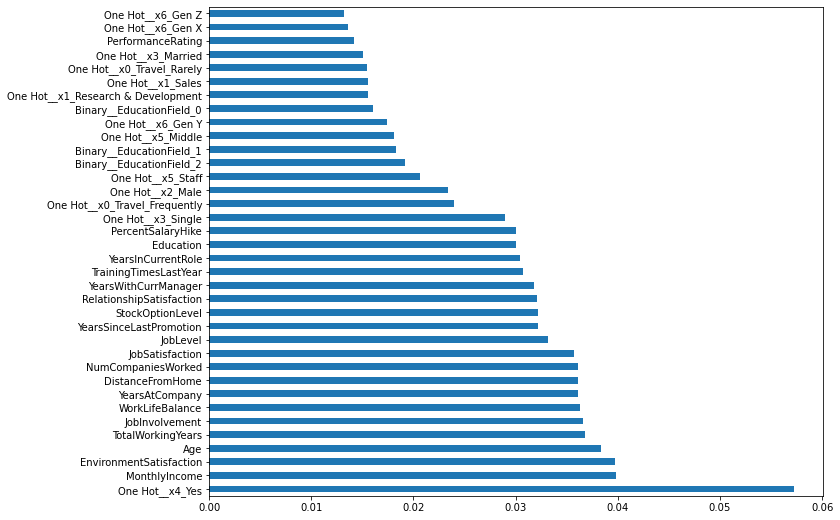

In [42]:
# Plotting a feature importance
plt.figure(figsize=(11, 9))
feat_imp = pd.Series(extra_tree.feature_importances_, index=df_encoded.columns)
feat_imp.nlargest(40).plot(kind='barh');

#### **If only want to use some selected features**

In [43]:
# feat_imp.nlargest(20).to_clipboard()

In [44]:
# X_selected = df[['OverTime', 'TotalWorkingYears', 'MonthlyIncome', 'Age', 'YearsAtCompany', 'JobSatisfaction', 'DistanceFromHome',
#                 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'YearsInCurrentRole', 'YearsWithCurrManager',
#                 'WorkLifeBalance', 'NumCompaniesWorked', 'JobLevel', 'YearsSinceLastPromotion', 'PercentSalaryHike',
#                 'StockOptionLevel', 'JobInvolvement', 'TrainingTimesLastYear', 'MaritalStatus', 'Education']]


In [45]:
# transformer = ColumnTransformer([
#     ('One Hot', OneHotEncoder(drop='first'), ['MaritalStatus', 'OverTime'])
# ], remainder='passthrough')

In [46]:
# X_train_sel, X_test_sel, y_train_sel, y_test_sel= train_test_split(
#     X_selected,
#     y, 
#     stratify = y,  
#     test_size = 0.2,
#     random_state = 1)

In [47]:
# X_train_selected = pd.DataFrame(transformer.fit_transform(X_train_sel))
# X_test_selected = pd.DataFrame(transformer.transform(X_test_sel))

### **Modeling**

In [48]:
# Define models
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=1)
logreg = LogisticRegression(random_state=1, class_weight='balanced')
rf = RandomForestClassifier(random_state=1, class_weight='balanced')
ada = AdaBoostClassifier(tree, random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
xgbc = XGBClassifier(random_state=1, verbosity=0)

models = [knn, tree, logreg, rf, ada, gbc, xgbc]
score = []
nilai_mean = []
nilai_std = []

smote = SMOTE(random_state=1)
skfold = StratifiedKFold(n_splits=5)

for i in models:
    estimator = Pipeline([
        ('balancing', smote),
        ('model', i)
    ])

    model_cv = cross_val_score(estimator, X_train_prep, y_train, cv=skfold, scoring='roc_auc', error_score='raise')
    score.append(model_cv)
    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())

In [49]:
pd.DataFrame({
    'model':['knn', 'tree', 'logreg', 'rf', 'ada', 'gbc', 'xgbc'],
    'mean':nilai_mean,
    'std':nilai_std
})

,model,mean,std
0,knn,0.585113,0.017759
1,tree,0.607342,0.014155
2,logreg,0.734049,0.022121
3,rf,0.796161,0.046387
4,ada,0.614216,0.015362
5,gbc,0.800425,0.061436
6,xgbc,0.781242,0.044671


### **Model performance on test set**

In [50]:
models={
    'GBC': GradientBoostingClassifier(random_state=1),
    'RandomForest': RandomForestClassifier(random_state=1)
}

score=[]

for i in models:
    models[i].fit(X_train_prep, y_train)
    y_pred=models[i].predict(X_test_prep)
    score.append([roc_auc_score(y_test, y_pred)])

score_before_tuning = pd.DataFrame(score, columns=['ROC-AUC Score'], index = models.keys())
score_before_tuning

,ROC-AUC Score
GBC,0.692523
RandomForest,0.591696


### **Tuning the model benchmark**

In [51]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [52]:
# Hyperparameter space GBC
hyperparam_space_gbc = [
    {'clf__learning_rate':[0.2], 'clf__n_estimators':[50], 'clf__max_depth':[3, 4, 5]},
    {'clf__learning_rate':[0.1], 'clf__n_estimators':[100], 'clf__max_depth':[3, 4, 5]},
    {'clf__learning_rate':[0.05], 'clf__n_estimators':[500], 'clf__max_depth':[3, 4, 5]},
    {'clf__learning_rate':[0.01], 'clf__n_estimators':[1000], 'clf__max_depth':[3, 4, 5]},
    {'clf__learning_rate':[0.005], 'clf__n_estimators':[5000], 'clf__max_depth':[3, 4, 5]}
]

In [53]:
# Create the algorithm chains
smote = SMOTE(random_state=1)
estimator_gbc = Pipeline([('balancing', smote), ('clf', gbc)])

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=1)

# Hyperparameter tuning
grid_gbc = GridSearchCV(
    estimator_gbc, 
    param_grid = hyperparam_space_gbc, 
    cv = skf, 
    scoring = 'roc_auc', 
    n_jobs = -1 
)

In [54]:
grid_gbc.fit(X_train_prep, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('balancing', SMOTE(random_state=1)),
                                       ('clf',
                                        GradientBoostingClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'clf__learning_rate': [0.2],
                          'clf__max_depth': [3, 4, 5],
                          'clf__n_estimators': [50]},
                         {'clf__learning_rate': [0.1],
                          'clf__max_depth': [3, 4, 5],
                          'clf__n_estimators': [100]},
                         {'clf__learning_rate': [0.05],
                          'clf__max_depth': [3, 4, 5],
                          'clf__n_estimators': [500]},
                         {'clf__learning_rate': [0.01],
                          'clf__max_depth': [3, 4, 5],
                          'clf__n_estimators': [1000]},
                         {'c

In [55]:
print('GBC')
print('Best_score:', grid_gbc.best_score_)
print('Best_params:', grid_gbc.best_params_)

GBC
Best_score: 0.8285120777640147
Best_params: {'clf__learning_rate': 0.005, 'clf__max_depth': 3, 'clf__n_estimators': 5000}


### **Use the best estimator to predict test set**

In [56]:
gbc_tuning = grid_gbc.best_estimator_
gbc_tuning.fit(X_train_prep, y_train)

y_pred_gbc_tuning = gbc_tuning.predict(X_test_prep)
roc_gbc_tuning = roc_auc_score(y_test, y_pred_gbc_tuning)

In [57]:
score_list = [roc_gbc_tuning]
models = ['GBC']
score_after_tuning = pd.DataFrame({
    'Model': models,
    'ROC-AUC Score': score_list
})

### **Comparison**

In [58]:
score_before_tuning

,ROC-AUC Score
GBC,0.692523
RandomForest,0.591696


In [59]:
score_after_tuning

,Model,ROC-AUC Score
0,GBC,0.695581


In [60]:
print('GradientBoostingClassifier')
print(classification_report(y_test, y_pred_gbc_tuning))

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       247
           1       0.54      0.47      0.50        47

    accuracy                           0.85       294
   macro avg       0.72      0.70      0.71       294
weighted avg       0.84      0.85      0.85       294



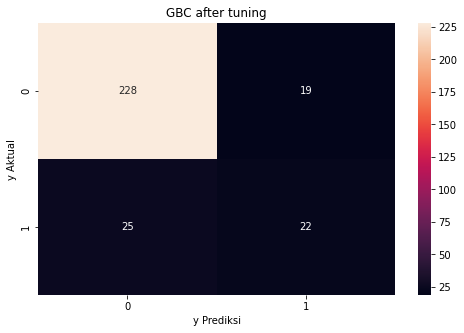

In [61]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_gbc_tuning), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('GBC after tuning');

In [62]:
gbc_roc = gbc_tuning.fit(X_train_prep, y_train)

y_proba = gbc_roc.predict_proba(X_test_prep)
y_proba = y_proba[:, 1]

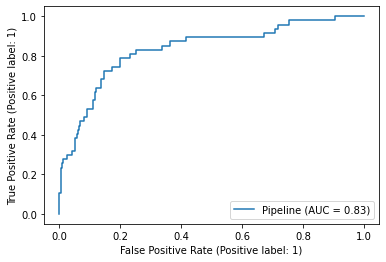

In [63]:
plot_roc_curve(gbc_roc, X_test_prep, y_test);

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)

In [65]:
pd.set_option('display.max_rows', None)
pd.DataFrame({
    'fpr':fpr,
    'tpr':tpr,
    'thresholds':thresholds    
})

,fpr,tpr,thresholds
0,0.000000,0.000000,1.988632
1,0.000000,0.021277,0.988632
2,0.000000,0.106383,0.965677
3,0.004049,0.106383,0.956894
4,0.004049,0.234043,0.870156
5,0.008097,0.234043,0.798356
6,0.008097,0.255319,0.796728
7,0.012146,0.255319,0.774617
8,0.012146,0.276596,0.765938
9,0.024291,0.276596,0.702361


### **SHAP**

 96%|=================== | 1129/1176 [00:18<00:00]       

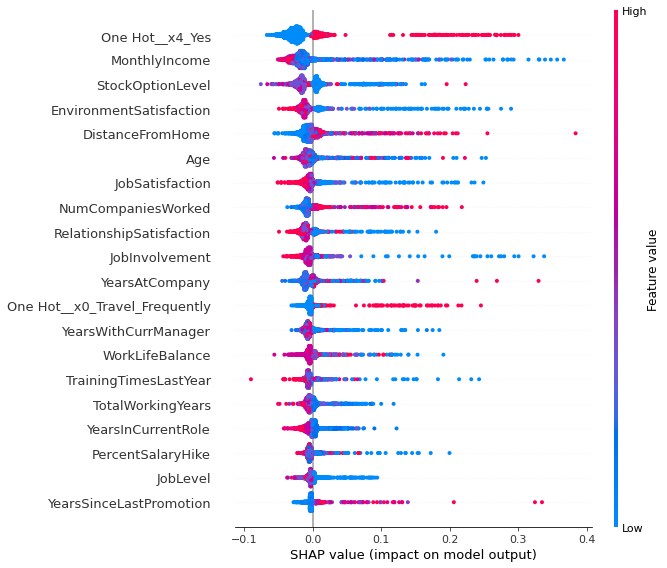

In [68]:
import shap

clf_gbc = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=400, random_state=1)
clf_gbc.fit(X_train_prep, y_train)

shap_values = shap.TreeExplainer(clf_gbc,
                                 data = X_train_prep,
                                 feature_dependence='independent',
                                 model_output='probability').shap_values(X_train_prep)
shap.summary_plot(shap_values, X_train_prep, feature_names=df_encoded.columns)

**Contoh interpretasi**

- OverTime = Yes, meningkatkan prediksi apakah pegawai cenderung ingin resign atau tidak.
- JobSatisfaction rendah, meningkatkan prediksi apakah pegawai cenderung ingin resign atau tidak.

**Shapley Value of Explanations (SHAP) Per Observation Feature**

In [69]:
shap.initjs()

In [70]:
def shap_plot(j, model, S):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [71]:
X_test.iloc[[0, 6, 63]]

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Generation
249,45,Travel_Frequently,Research & Development,7,4,Life Sciences,1,Male,4,2,Executive,3,Married,6434,4,No,17,3,4,1,9,1,3,3,2,0,2,Gen X
1060,24,Travel_Frequently,Research & Development,9,3,Medical,2,Male,3,1,Staff,1,Single,3172,2,Yes,11,3,3,0,4,2,2,0,0,0,0,Gen Y
655,33,Travel_Rarely,Human Resources,3,2,Human Resources,4,Male,3,1,Staff,2,Divorced,2277,3,Yes,11,3,3,1,7,4,4,4,3,0,3,Gen Y


In [72]:
y_test.iloc[[0, 6, 63]]

249     0
1060    1
655     0
Name: Attrition, dtype: int32

In [73]:
# Let's compare with the real result
print(f"The prediction must predict this employee is: {('Left' if y_test.iloc[0] == 1 else 'Not Leave')} from y_test")

shap_plot(0, clf_gbc, X_test_prep)

The prediction must predict this employee is: Not Leave from y_test


In [74]:
# Let's compare with the real result
print(f"The prediction must predict this employee is: {('Left' if y_test.iloc[6] == 1 else 'Not Leave')} from y_test")

shap_plot(6, clf_gbc, X_test_prep)

The prediction must predict this employee is: Left from y_test


### **Recommendations**

Dari SHAP plot di atas, dapat dilihat feature-feature yang memengaruhi keputusan pegawai untuk resign atau tidak. Feature OverTime, StockOptionLevel, dan MonthlyIncome menjadi 3 features teratas yang memengaruhi employee's attrition. Oleh karena itu, perlu dikaji ulang hal-hal sebagai berikut:

1. Masalah overtime, dapat dievaluasi kembali workload dari para pegawai. Perlu dicari tahu mengapa mereka sering bekerja overtime, dan jikalau memang harus bekerja overtime, apakah benefit yang mereka dapatkan sudah sesuai? Perlu dievaluasi juga mengenai hal tersebut. Hal ini juga berkaitan dengan monthly income yang mereka dapatkan.
2. Mengenai StockOptionLevel, dapat diberikan valuasi lebih terhadap pegawai yang cenderung akan resign, selama pegawai ini memang performanya baik.
3. Dapat dievaluasi kembali mengenai culture kerja dari perusahaan. Perlu adanya strategi yang actionable untuk dapat membangun work culture and environment yang baik. Jika perusahaan memiliki culture kerja dan support system yang baik, tentu hal ini dapat meningkatkan environment dan job satisfaction para pegawai.